In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from part2.part2helpers import get_individual_parameter_estimates, simulate_trials
from part2.part2helpers import get_parameter_recovery_correlation

In [2]:
mean = np.array([0.369,5.683])
covariance = np.array([[0.0154, 0], [0, 1.647]])
parameter_sets = np.random.multivariate_normal(mean, covariance, 55)

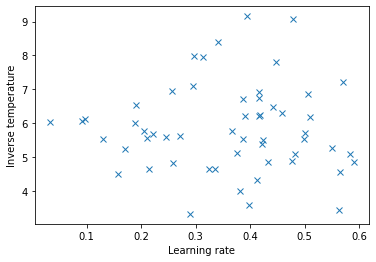

In [3]:
plt.plot(parameter_sets[:, 0], parameter_sets[:, 1], 'x')
plt.ylabel("Inverse temperature")
plt.xlabel("Learning rate")
plt.savefig('../report/figures/part2/task7/parametergaussian.pdf')

In [4]:
# all_choices = []
# all_reward_received = []
# for learning_rate, inverse_temperature in parameter_sets:
#     stimulus_values, choices, reward_received = simulate_trials(learning_rate=learning_rate, inverse_temperature=inverse_temperature)
#     all_choices.append(choices)
#     all_reward_received.append(reward_received)
#
# all_choices = pd.DataFrame(all_choices)
# all_reward_received = pd.DataFrame(all_reward_received)

In [5]:
# recovered_parameter_estimates = get_individual_parameter_estimates(all_choices, all_reward_received)

In [6]:
# fixed_parameters = pd.DataFrame(parameter_sets, columns=['learning_rate', 'inverse_temperature'])

In [7]:
# fixed_parameters.corrwith(recovered_parameter_estimates)

In [8]:
# fig, axes = plt.subplots(ncols=2, figsize=(12,4))
# axes[0].scatter(fixed_parameters['learning_rate'], recovered_parameter_estimates['learning_rate'])
# axes[0].set_xlabel("Simulated learning rate")
# axes[0].set_ylabel("Fitted learning rate")
#
# axes[1].scatter(fixed_parameters['inverse_temperature'], recovered_parameter_estimates['inverse_temperature'])
# axes[1].set_xlabel("Simulated inverse temperature")
# axes[1].set_ylabel("Fitted inverse temperature")
# fig.savefig('../report/figures/part2/task7/parameter_correlations.pdf')


In [33]:
correlations = []
for i in range(1, 11):
    correlations.append(get_parameter_recovery_correlation(num_48_trial_batches=i, num_simulations=55))

/home/mclancy/ccn/coursework2/part2/part2helpers.py:64: RuntimeWarning: overflow encountered in exp
  choice_probabilities[i] = np.exp(inverse_temperature * V[choice_index]) \
/home/mclancy/ccn/coursework2/part2/part2helpers.py:65: RuntimeWarning: overflow encountered in exp
  / (np.exp(inverse_temperature * V[choice_index]) + np.exp(inverse_temperature * V[int(not choice_index)]))
/home/mclancy/ccn/coursework2/part2/part2helpers.py:64: RuntimeWarning: invalid value encountered in double_scalars
  choice_probabilities[i] = np.exp(inverse_temperature * V[choice_index]) \
/home/mclancy/ccn/coursework2/part2/part2helpers.py:67: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(choice_probabilities))


In [34]:
all_trial_correlations = pd.concat(correlations, axis=1)

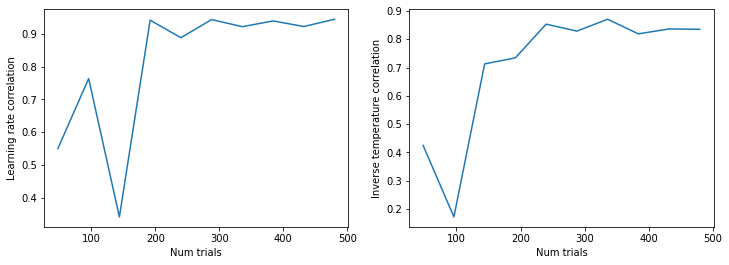

In [37]:
x = list(range(48,528, 48))

fig, axes = plt.subplots(ncols=2, figsize=(12,4))
axes[0].plot(x, all_trial_correlations.loc['learning_rate'])
axes[0].set_xlabel("Num trials")
axes[0].set_ylabel("Learning rate correlation")

axes[1].plot(x, all_trial_correlations.loc['inverse_temperature'])
axes[1].set_xlabel("Num trials")
axes[1].set_ylabel("Inverse temperature correlation")
plt.savefig('../report/figures/part2/task7/varying_num_trials.pdf')

In [38]:
num_simulation_correlations = []
for i in range(10, 110, 10):
    num_simulation_correlations.append(get_parameter_recovery_correlation(num_simulations=i))

all_simulation_correlations = pd.concat(num_simulation_correlations, axis=1)

/home/mclancy/ccn/coursework2/part2/part2helpers.py:64: RuntimeWarning: overflow encountered in exp
  choice_probabilities[i] = np.exp(inverse_temperature * V[choice_index]) \
/home/mclancy/ccn/coursework2/part2/part2helpers.py:65: RuntimeWarning: overflow encountered in exp
  / (np.exp(inverse_temperature * V[choice_index]) + np.exp(inverse_temperature * V[int(not choice_index)]))
/home/mclancy/ccn/coursework2/part2/part2helpers.py:64: RuntimeWarning: invalid value encountered in double_scalars
  choice_probabilities[i] = np.exp(inverse_temperature * V[choice_index]) \
/home/mclancy/ccn/coursework2/part2/part2helpers.py:67: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(choice_probabilities))


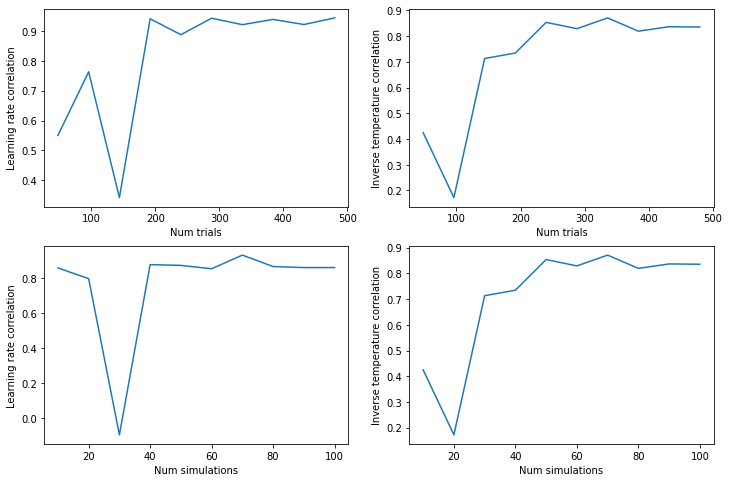

In [40]:
trial_range = list(range(48,528, 48))
simulation_range = list(range(10, 110, 10))

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12,8))
axes[0,0].plot(trial_range, all_trial_correlations.loc['learning_rate'])
axes[0,0].set_xlabel("Num trials")
axes[0,0].set_ylabel("Learning rate correlation")

axes[0,1].plot(trial_range, all_trial_correlations.loc['inverse_temperature'])
axes[0,1].set_xlabel("Num trials")
axes[0,1].set_ylabel("Inverse temperature correlation")

axes[1,0].plot(simulation_range, all_simulation_correlations.loc['learning_rate'])
axes[1,0].set_xlabel("Num simulations")
axes[1,0].set_ylabel("Learning rate correlation")

axes[1,1].plot(simulation_range, all_trial_correlations.loc['inverse_temperature'])
axes[1,1].set_xlabel("Num simulations")
axes[1,1].set_ylabel("Inverse temperature correlation")
plt.savefig('../report/figures/part2/task7/varying_num_trials_and_simulations.pdf')